In [68]:
%matplotlib inline
import pandas as pd
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA

raw = mne.io.read_raw_edf(r'D:\EEG\EEG_Data_Analysis\dataset\S001\S001R04.edf', preload=True)
print(raw.ch_names)


# Example renaming of channels to match the 'standard_1020' montage
new_names = {
    'Fc5.': 'FC5', 'Fc3.': 'FC3', 'Fc1.': 'FC1', 'Fcz.': 'FCz', 'Fc2.': 'FC2', 'Fc4.': 'FC4', 'Fc6.': 'FC6',
    'C5..': 'C5', 'C3..': 'C3', 'C1..': 'C1', 'Cz..': 'Cz', 'C2..': 'C2', 'C4..': 'C4', 'C6..': 'C6',
    'Cp5.': 'CP5', 'Cp3.': 'CP3', 'Cp1.': 'CP1', 'Cpz.': 'CPz', 'Cp2.': 'CP2', 'Cp4.': 'CP4', 'Cp6.': 'CP6',
    'Fp1.': 'Fp1', 'Fpz.': 'Fpz', 'Fp2.': 'Fp2',
    'Af7.': 'AF7', 'Af3.': 'AF3', 'Afz.': 'AFz', 'Af4.': 'AF4', 'Af8.': 'AF8',
    'F7..': 'F7', 'F5..': 'F5', 'F3..': 'F3', 'F1..': 'F1', 'Fz..': 'Fz', 'F2..': 'F2', 'F4..': 'F4', 'F6..': 'F6', 'F8..': 'F8',
    'Ft7.': 'FT7', 'Ft8.': 'FT8',
    'T7..': 'T7', 'T8..': 'T8', 'T9..': 'T9', 'T10.': 'T10',
    'Tp7.': 'TP7', 'Tp8.': 'TP8',
    'P7..': 'P7', 'P5..': 'P5', 'P3..': 'P3', 'P1..': 'P1', 'Pz..': 'Pz', 'P2..': 'P2', 'P4..': 'P4', 'P6..': 'P6', 'P8..': 'P8',
    'Po7.': 'PO7', 'Po3.': 'PO3', 'Poz.': 'POz', 'Po4.': 'PO4', 'Po8.': 'PO8',
    'O1..': 'O1', 'Oz..': 'Oz', 'O2..': 'O2', 
    'Iz..': 'Iz'
}

raw.rename_channels(new_names)
print(raw.info)
raw.get_channel_types()

montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

print(raw.info['chs'])

events, event_id = mne.events_from_annotations(raw)
print(events)
print(event_id)
print(raw.annotations)

event_dict = {
    "rest": 1,
    "motion/left_fist/both_fist": 2,
    "motion/right_fist/both_feet": 3
    
}

epochs = mne.Epochs(
    raw,
    events,
    event_id=event_dict,
    tmin=-0.2,
    tmax=0.5,
    preload=True,
)


Extracting EDF parameters from D:\EEG\EEG_Data_Analysis\dataset\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
<Info | 8 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 H

In [58]:
# Apply band-pass filter for the Alpha band (8-13 Hz)
raw_alpha = raw.copy().filter(8, 13, l_trans_bandwidth=1, h_trans_bandwidth=1, fir_design='firwin')

# Apply band-pass filter for the Beta band (13-30 Hz)
raw_beta = raw.copy().filter(13, 30, l_trans_bandwidth=1, h_trans_bandwidth=1, fir_design='firwin')
# Optionally, save the filtered data to new EDF files (if needed)
# raw_alpha.save('/mnt/data/S001R01_alpha.edf', overwrite=True)
# raw_beta.save('/mnt/data/S001R01_beta.edf', overwrite=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 30.50 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


In [43]:
# Assuming 'raw' is your preloaded MNE-Python Raw object
data, times = raw_alpha[:, :]

# Correctly creating DataFrame for EEG data
df_data = pd.DataFrame(data.transpose(), columns=raw.ch_names)

# Correctly creating DataFrame for time points
# Note: Only a single column, so we name it 'Time'
df_times = pd.DataFrame(times, columns=['Time'])

# Display the first few rows of each DataFrame
print(df_data.head(5))  # Display the first few rows of EEG data
print(df_times.head(5))  # Display the first few time points

            FC5           FC3           FC1           FCz           FC2  \
0  6.776264e-21  6.776264e-21  1.016440e-20  1.524659e-20  1.524659e-20   
1 -8.010127e-06 -8.832356e-06 -1.039996e-05 -1.291151e-05 -1.465866e-05   
2 -1.484978e-05 -1.648818e-05 -1.935282e-05 -2.391701e-05 -2.694242e-05   
3 -1.951054e-05 -2.192437e-05 -2.559682e-05 -3.139151e-05 -3.488255e-05   
4 -2.128821e-05 -2.435897e-05 -2.822498e-05 -3.423333e-05 -3.725125e-05   

            FC4           FC6            C5            C3            C1  ...  \
0  8.470329e-21  1.694066e-21  5.082198e-21  6.776264e-21  6.776264e-21  ...   
1 -1.327648e-05 -9.562946e-06 -9.710666e-06 -1.052063e-05 -1.117230e-05  ...   
2 -2.434328e-05 -1.770341e-05 -1.779307e-05 -1.947945e-05 -2.077848e-05  ...   
3 -3.138163e-05 -2.322300e-05 -2.290017e-05 -2.553851e-05 -2.746062e-05  ...   
4 -3.328300e-05 -2.533893e-05 -2.419849e-05 -2.778094e-05 -3.025552e-05  ...   

             P8           PO7           PO3           POz           

Fitting ICA to data using 64 channels (please be patient, this may take a while)


C:\Users\sanji\AppData\Local\Temp\ipykernel_15316\3953286342.py:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 4 components
Fitting ICA took 0.4s.


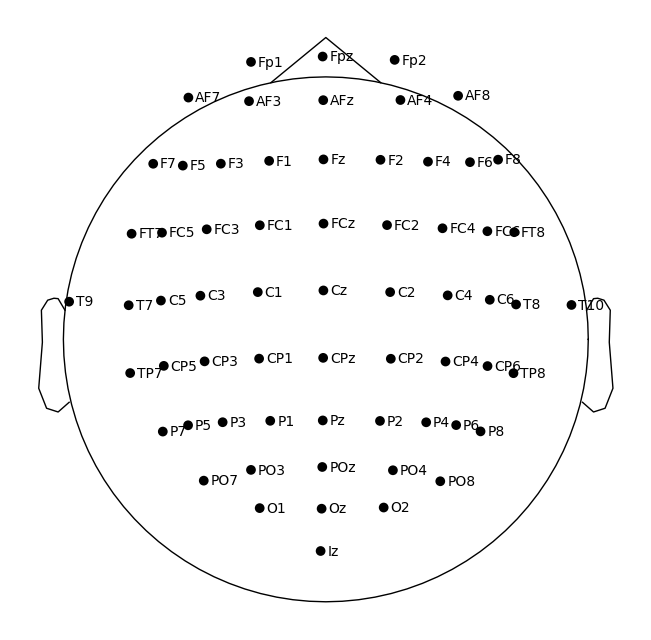

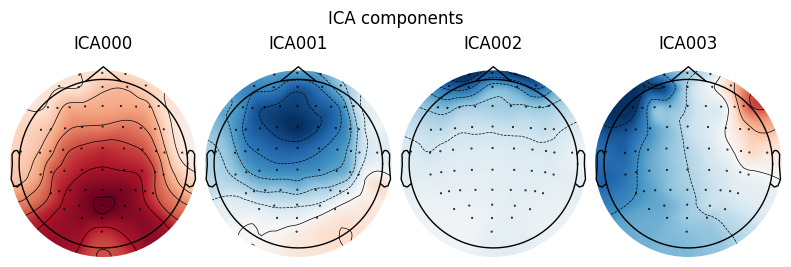

Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 2 ICA components
    Projecting back using 64 PCA components


Measurement date,"August 12, 2009 16:15:00 GMT"
Experimenter,Unknown
Participant,X
Digitized points,67 points
Good channels,64 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,160.00 Hz
Highpass,0.00 Hz
Lowpass,80.00 Hz


In [59]:
from mne.preprocessing import ICA
# Set up and fit the ICA
ica = ICA(n_components=4, random_state=97, max_iter=800)
ica.fit(raw)



raw.plot_sensors(show_names=True)
# Plot the ICA components to visually identify artifact components
ica.plot_components()

# Once you've identified components that represent artifacts, you can exclude them
# Example: Assuming components 0 and 1 are artifacts
ica.exclude = [0, 1]

# Apply the ICA solution to the Raw data, effectively removing the artifacts
ica.apply(raw)

# Optional: Save the cleaned data to a new file
# raw.save('/mnt/data/S001R01_cleaned.edf', overwrite=True)

Filtering:

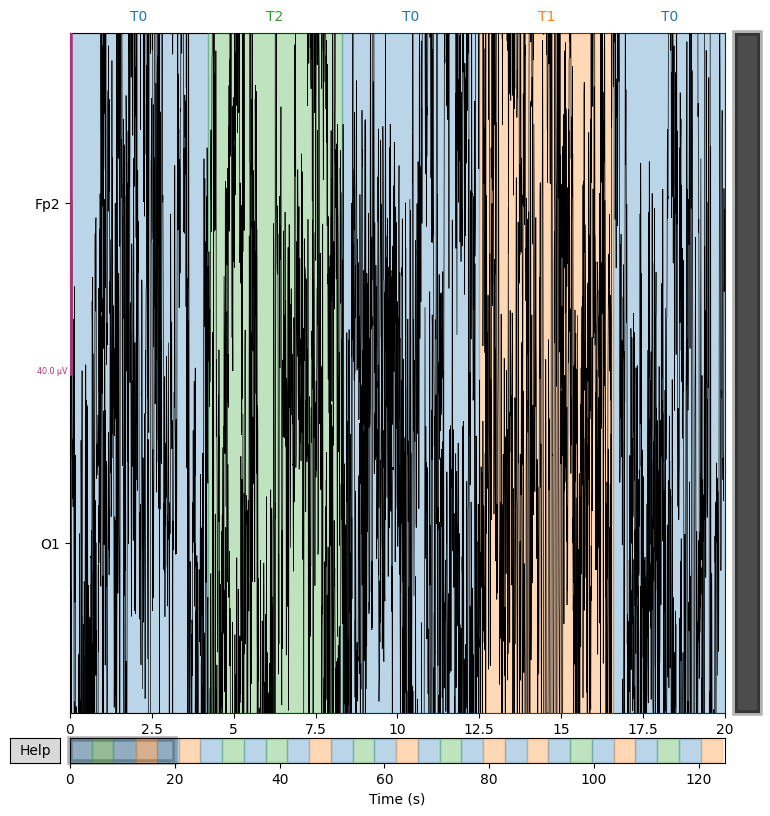

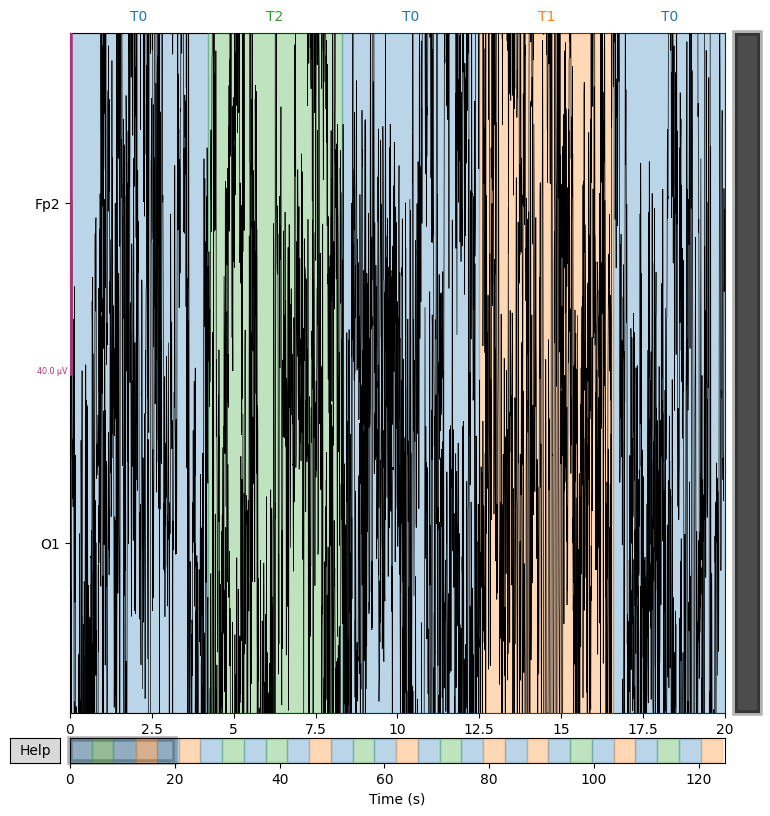

In [60]:
# raw.compute_psd(fmax=64).plot(picks="data", exclude="bads")
#raw_picked = raw['FC5','FC3']
# Now plot the data for the picked channel
# raw.plot(duration=1, n_channels=2, picks = [20,60])

# raw.plot(duration=1, n_channels=1, picks=[channel_name], title=channel_name)

raw_copy = raw.copy().pick([23, 60])  # Picking channels by index
raw_copy.plot(duration=20, n_channels=2)


Fitting ICA to data using 64 channels (please be patient, this may take a while)


C:\Users\sanji\AppData\Local\Temp\ipykernel_15316\111348735.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 64 components
Fitting ICA took 3.4s.


C:\Users\sanji\AppData\Local\Temp\ipykernel_15316\111348735.py:3: RuntimeWarning: Using n_components=64 (resulting in n_components_=64) may lead to an unstable mixing matrix estimation because the ratio between the largest (39) and smallest (4.5e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 62
  ica.fit(raw)


[23, 60]
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated


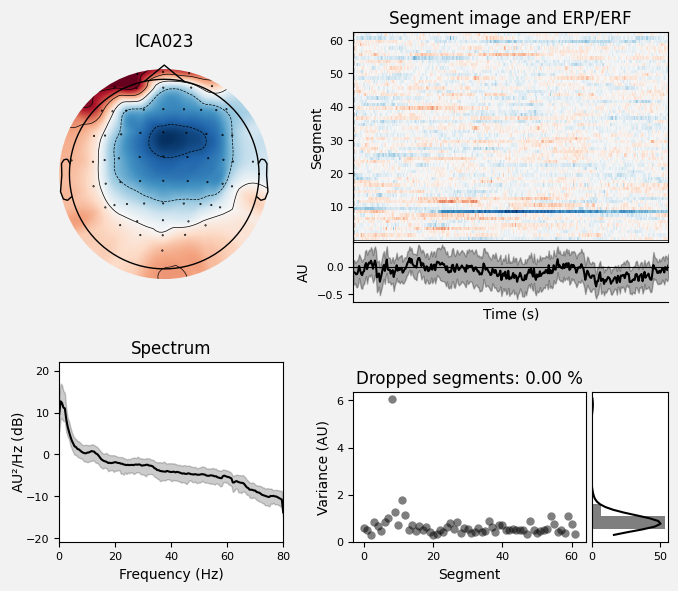

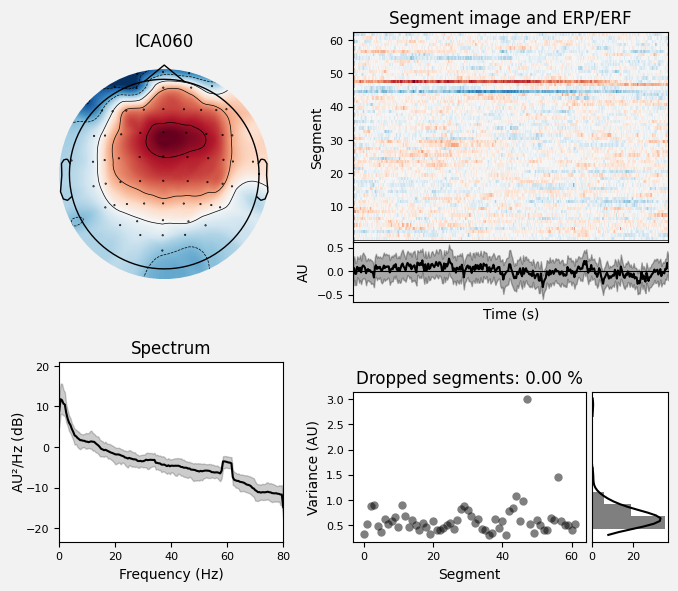

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [61]:

# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=64, random_state=97, max_iter=800)
ica.fit(raw)
# Define the channels of interest with their corresponding labels
channels_of_interest = ['Fp2', 'O1']

# Initialize a list to store the updated channel indexes
updated_channels_of_interest = []

# Loop through each channel label in channels_of_interest
for channel_label in channels_of_interest:
    # Get the index of the channel label in raw_cropped.ch_names
    channel_index = raw.ch_names.index(channel_label)
    # Append the index to the updated_channels_of_interest list
    updated_channels_of_interest.append(channel_index)

# Print the updated list
print(updated_channels_of_interest)


ica.plot_properties(raw, picks=updated_channels_of_interest)

Evoked responses

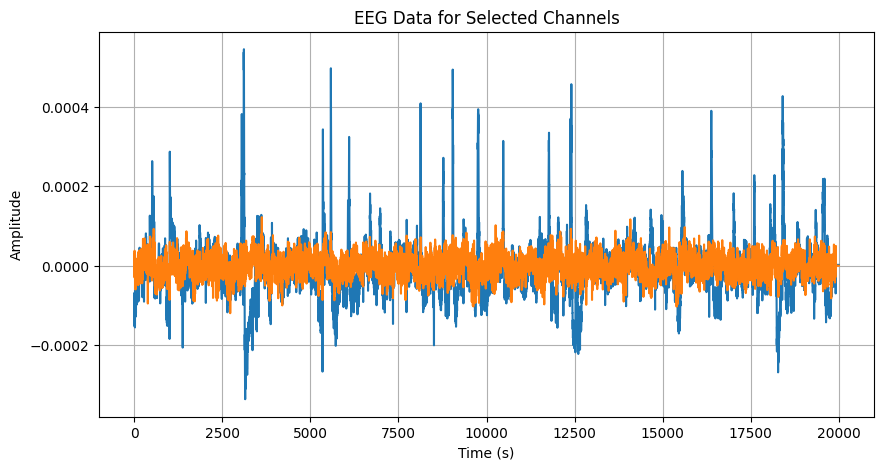

AttributeError: 'tuple' object has no attribute 'info'

In [47]:
raw_updated = raw[updated_channels_of_interest]  # This returns a tuple
import matplotlib.pyplot as plt
from mne.viz import plot_raw

# Extract the data from the tuple
data, _ = raw_updated

# Plot EEG data using Matplotlib
plt.figure(figsize=(10, 5))
plt.plot(data.T)  # Transpose the data for correct plotting
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EEG Data for Selected Channels')
plt.grid(True)
plt.show()

# Alternatively, you can use MNE's plot_raw function
plot_raw(raw_updated, duration=5)


Events

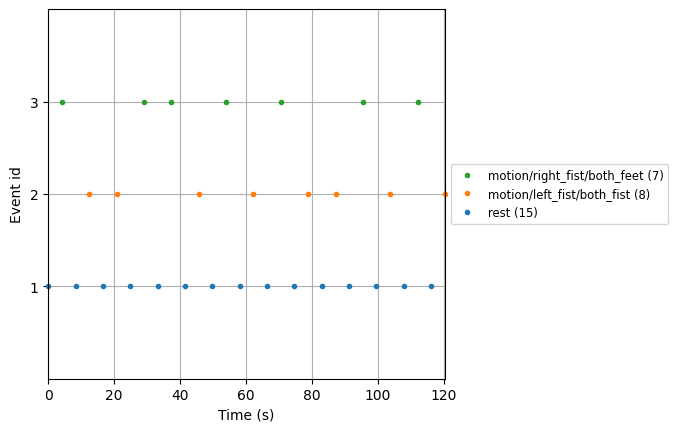

In [62]:
# Apply a band-pass filter
# raw.filter(l_freq=1, h_freq=40)
# events, event_id = mne.events_from_annotations(raw)
# print(events)
# print(event_id)



fig = mne.viz.plot_events(
    events, event_id=event_dict, sfreq=raw.info["sfreq"], first_samp=raw.first_samp
)







In [69]:


conds_we_care_about = ["rest", "motion/left_fist/both_fist", "motion/right_fist/both_feet"]
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place

rest_epochs = epochs["rest"]
left_both_fist_epochs = epochs["motion/left_fist/both_fist"]
right_fist_both_feet_epochs = epochs["motion/right_fist/both_feet"]
del raw, epochs  # free up memory

print(left_both_fist_epochs.ch_names)
print(left_both_fist_epochs.info['ch_names'])
# rest_epochs.plot(block = True )

rest_epochs.plot_image(picks =[23,60])
left_both_fist_epochs.plot_image(picks =[23,60])
right_fist_both_feet_epochs.plot_image(picks =[23,60])

Dropped 8 epochs: 3, 5, 11, 15, 19, 20, 21, 25
['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']
['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']
Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated
Not setting me

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 640x480 with 4 Axes>

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 640x480 with 4 Axes>

Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 640x480 with 4 Axes>

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 640x480 with 4 Axes>

Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
7 matching events found
No baseline correction applied
0 projection items activated


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 640x480 with 4 Axes>

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 640x480 with 4 Axes>

[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [64]:
# First, compute the average (evoked) responses for each condition

left_both_fist_evoked = left_both_fist_epochs.average()
right_fist_both_feet_evoked = right_fist_both_feet_epochs.average()
rest_epochs_evoked = rest_epochs.average()

print(left_both_fist_evoked)
print(right_fist_both_feet_evoked)
print(rest_epochs_evoked)

mne.viz.plot_compare_evokeds(
    dict(rest_Motion = rest_epochs_evoked, Left_Both_Fist_Motion=left_both_fist_evoked, right_fist_both_feet_Motion=right_fist_both_feet_evoked),
    legend="upper left",
    show_sensors="upper right",
)


<Evoked | 'motion/left_fist/both_fist' (average, N=7), -0.2 – 0.5 s, baseline -0.2 – 0 s, 64 ch, ~134 kB>
<Evoked | 'motion/right_fist/both_feet' (average, N=7), -0.2 – 0.5 s, baseline -0.2 – 0 s, 64 ch, ~134 kB>
<Evoked | 'rest' (average, N=7), -0.2 – 0.5 s, baseline -0.2 – 0 s, 64 ch, ~134 kB>
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 800x600 with 2 Axes>

[<Figure size 800x600 with 2 Axes>]

In [65]:


# Assuming `epochs` is your preprocessed EEG data segmented into epochs
occipital_epochs = epochs.copy().pick_channels(['Oz', 'O1', 'O2']) # Adjust channel names as needed
frontal_epochs = epochs.copy().pick_channels(['Fp1', 'Fp2']) # Adjust channel names as needed

# Calculate and plot the PSD for occipital and frontal regions
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
occipital_epochs.plot_psd(fmin=1, fmax=60, ax=axes[0], show=False)
axes[0].set_title('Occipital Alpha')
frontal_epochs.plot_psd(fmin=1, fmax=60, ax=axes[1], show=False)
axes[1].set_title('Frontal Activity')

plt.tight_layout()
plt.show()

NameError: name 'epochs' is not defined

In [56]:
epochs.get_data()
target = epochs["motion/left_fist/both_fist"].average()
target
# print(epochs.info['chs'])

NameError: name 'epochs' is not defined

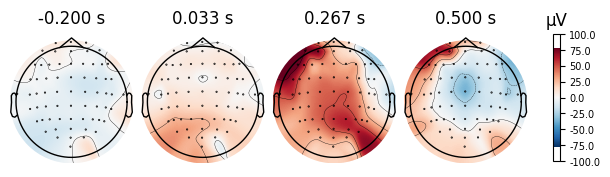

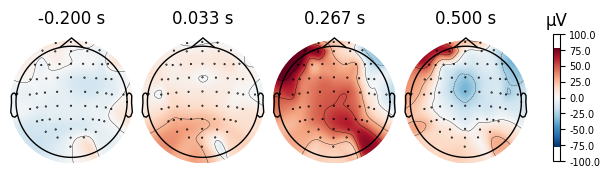

In [34]:

target.plot_topomap()


In [38]:
target.plot_joint()

No projector specified for this dataset. Please consider the method self.add_proj.


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 800x420 with 6 Axes>

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 800x420 with 6 Axes>

In [37]:
target.plot()

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 640x300 with 2 Axes>

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 640x300 with 2 Axes>

In [39]:
diff = mne.combine_evoked ((rest_epochs_evoked, -left_both_fist_evoked), weights = 'equal')


NameError: name 'rest_epochs_evoked' is not defined